In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
%matplotlib inline

In [23]:
dat = pd.read_table('yrbs.tsv.bz2')

In [6]:
dat.head()

,year,age,sex,meth,tv,state
0,2003,13,M,0,1,XX
1,2003,13,M,1,1,XX
2,2003,13,M,1,1,XX
3,2003,13,M,0,1,XX
4,2003,13,M,0,0,XX


In [8]:
dat.shape

(58077, 6)

In [9]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58077 entries, 0 to 58076
Data columns (total 6 columns):
year     58077 non-null int64
age      58077 non-null int64
sex      58077 non-null object
meth     58077 non-null int64
tv       58077 non-null int64
state    58077 non-null object
dtypes: int64(4), object(2)
memory usage: 2.7+ MB


In [15]:
print(dat.head())
print("\n Datset Dimensions:")
print(dat.shape)
print("\n Unique values in year column")
print(dat.year.unique())
print("\n Unique values in age column")
print(dat.age.unique())
print("\n Unique values in sex column")
print(dat.sex.unique())
print("\n Unique values in meth column")
print(dat.meth.unique())
print("\n Unique values in tv column")
print(dat.tv.unique())
print("\nUnique values in state column")
print(dat.state.unique())

   year  age sex  meth  tv state
0  2003   13   M     0   1    XX
1  2003   13   M     1   1    XX
2  2003   13   M     1   1    XX
3  2003   13   M     0   1    XX
4  2003   13   M     0   0    XX

 Datset Dimensions:
(58077, 6)

 Unique values in year column
[2003 2005 2007 2009]

 Unique values in age column
[13 14 15 16 17]

 Unique values in sex column
['M' 'F']

 Unique values in meth column
[0 1]

 Unique values in tv column
[1 0]

Unique values in state column
['XX' 'MT']


In [80]:
dat.loc[dat['year'] < 2006,'before'] = 1

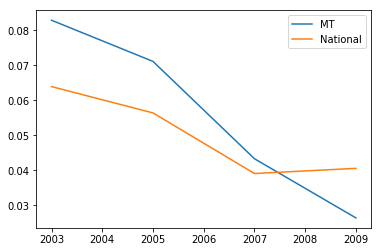

In [81]:
ym = dat.groupby(['year', 'state']).meth.mean().reset_index()
plt.plot(ym.year[ym.state=='MT'], ym.meth[ym.state=='MT'], label='MT')
plt.plot(ym.year[ym.state=='XX'], ym.meth[ym.state=='XX'], label='National')
plt.legend()

Steady decrease in meth use in Montana despite rise in national average

In [96]:
print(dat[dat.state == 'MT'].groupby('before').meth.mean())

before
False    0.038115
True     0.076734
Name: meth, dtype: float64


In [71]:
m = smf.ols(formula = 'meth ~ before', data = dat[dat.state == 'MT'])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     67.66
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.19e-16
Time:                        19:17:37   Log-Likelihood:                 417.76
No. Observations:                9754   AIC:                            -831.5
Df Residuals:                    9752   BIC:                            -817.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0381      0.003     11.484      0.000       0.032       0.045
before[T.True]     0.0386      0.005      8.225      0.000       0.029       0.048
==============================================================================
Omnibus:                     7326.455   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84570.020
Skew:                           3.765   Prob(JB):                         0.00
Kurtosis:                      15.304   Cond. No.                         2.62
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Reduction in use after 2006 vs before 2006 based on intercept values. 

In [72]:
m = smf.ols(formula = 'meth ~ before + age + sex + tv', data = dat[dat.state == 'MT'])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     23.20
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           4.11e-19
Time:                        19:17:42   Log-Likelihood:                 430.25
No. Observations:                9754   AIC:                            -850.5
Df Residuals:                    9749   BIC:                            -814.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.1476      0.038     -3.911      0.000      -0.222      -0.074
before[T.True]     0.0386      0.005      8.221      0.000       0.029       0.048
sex[T.M]          -0.0031      0.005     -0.653      0.514      -0.012       0.006
age                0.0118      0.002      4.953      0.000       0.007       0.016
tv                 0.0035      0.005      0.739      0.460      -0.006       0.013
==============================================================================
Omnibus:                     7302.251   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            83719.425
Skew:                           3.750   Prob(JB):                         0.00
Kurtosis:                      15.237   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age/year have a significant impact on meth use.

In [97]:
print(dat[dat['before'] == False].groupby(['state']).meth.mean())

state
MT    0.038115
XX    0.039923
Name: meth, dtype: float64


In [98]:
m = smf.ols(formula= 'meth ~ state', data = dat[dat['before'] == False])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3503
Date:                Wed, 18 Apr 2018   Prob (F-statistic):              0.554
Time:                        20:23:52   Log-Likelihood:                 6404.0
No. Observations:               29728   AIC:                        -1.280e+04
Df Residuals:                   29726   BIC:                        -1.279e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0381      0.003     13.648      0.000       0.033       0.044
state[T.XX]     0.0018      0.003      0.592      0.554      -0.004       0.008
==============================================================================
Omnibus:                    27196.729   Durbin-Watson:                   1.976
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           619647.247
Skew:                           4.720   Prob(JB):                         0.00
Kurtosis:                      23.277   Cond. No.                         4.75
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
m = smf.ols(formula= 'meth ~ state + age + tv + sex', data = dat[dat['before'] == False])
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     11.60
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.07e-09
Time:                        19:59:11   Log-Likelihood:                 6427.0
No. Observations:               29728   AIC:                        -1.284e+04
Df Residuals:                   29723   BIC:                        -1.280e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -0.0649      0.018     -3.615      0.000      -0.100      -0.030
state[T.XX]     0.0015      0.003      0.494      0.621      -0.005       0.008
sex[T.M]        0.0081      0.002      3.563      0.000       0.004       0.013
age             0.0064      0.001      5.648      0.000       0.004       0.009
tv             -0.0016      0.002     -0.683      0.494      -0.006       0.003
==============================================================================
Omnibus:                    27150.346   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           615983.002
Skew:                           4.709   Prob(JB):                         0.00
Kurtosis:                      23.214   Cond. No.                         253.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Age/sex have a significant impact on meth use

In [87]:
print(dat.groupby(['state','before']).meth.mean())

state  before
MT     False     0.038115
       True      0.076734
XX     False     0.039923
       True      0.060319
Name: meth, dtype: float64


In [89]:
m = smf.ols(formula= 'meth ~ state + before', data = dat)
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     87.40
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           1.26e-38
Time:                        20:01:48   Log-Likelihood:                 5559.9
No. Observations:               58077   AIC:                        -1.111e+04
Df Residuals:                   58074   BIC:                        -1.109e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0457      0.002     18.990      0.000       0.041       0.050
state[T.XX]       -0.0073      0.002     -2.972      0.003      -0.012      -0.002
before[T.True]     0.0235      0.002     12.851      0.000       0.020       0.027
==============================================================================
Omnibus:                    46595.999   Durbin-Watson:                   1.970
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           670600.618
Skew:                           4.059   Prob(JB):                         0.00
Kurtosis:                      17.534   Cond. No.                         5.17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
m = smf.ols(formula= 'meth ~ state + before + sex + tv + age', data = dat)
m.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   meth   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     50.37
Date:                Wed, 18 Apr 2018   Prob (F-statistic):           2.89e-52
Time:                        20:02:02   Log-Likelihood:                 5598.3
No. Observations:               58077   AIC:                        -1.118e+04
Df Residuals:                   58071   BIC:                        -1.113e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0645      0.015     -4.421      0.000      -0.093      -0.036
state[T.XX]       -0.0074      0.002     -3.003      0.003      -0.012      -0.003
before[T.True]     0.0235      0.002     12.880      0.000       0.020       0.027
sex[T.M]           0.0064      0.002      3.486      0.000       0.003       0.010
tv                -0.0041      0.002     -2.170      0.030      -0.008      -0.000
age                0.0069      0.001      7.600      0.000       0.005       0.009
==============================================================================
Omnibus:                    46521.765   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           667211.354
Skew:                           4.050   Prob(JB):                         0.00
Kurtosis:                      17.495   Cond. No.                         255.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""